<a href="https://colab.research.google.com/github/AMaheshVardhan/Mini-Project-TEAM-6-/blob/main/HModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


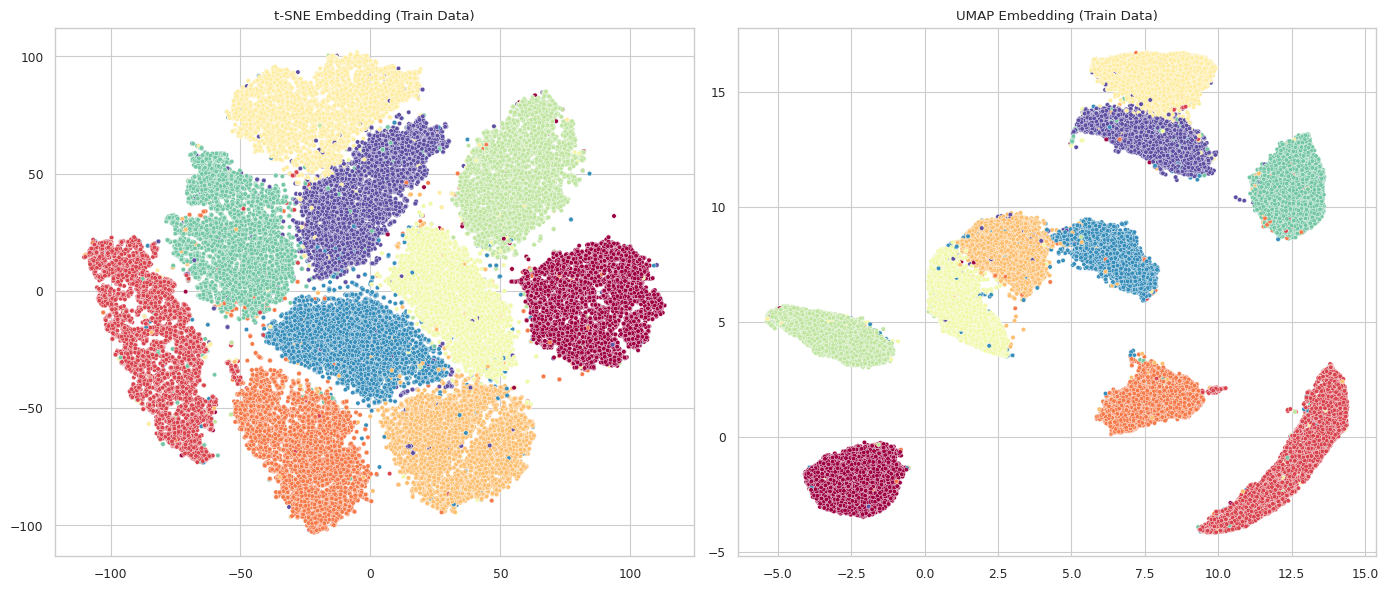

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:16:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (PCA + t-SNE): 0.0812
Classification Report (PCA + t-SNE):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1343
           1       0.00      0.00      0.00      1600
           2       0.01      0.01      0.01      1380
           3       0.41      0.30      0.35      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.00      0.00      0.00      1396
           7       0.07      0.08      0.07      1503
           8       0.13      0.16      0.15      1357
           9       0.21      0.24      0.22      1420

    accuracy                           0.08     14000
   macro avg       0.08      0.08      0.08     14000
weighted avg       0.08      0.08      0.08     14000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:16:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (PCA + UMAP): 0.9595
Classification Report (PCA + UMAP):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.95      0.99      0.97      1600
           2       0.96      0.95      0.96      1380
           3       0.95      0.94      0.95      1433
           4       0.97      0.95      0.96      1295
           5       0.96      0.96      0.96      1273
           6       0.97      0.99      0.98      1396
           7       0.96      0.96      0.96      1503
           8       0.96      0.93      0.95      1357
           9       0.93      0.94      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:16:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (Original Data): 0.9781
Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.98      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.97      0.98      1503
           8       0.97      0.97      0.97      1357
           9       0.97      0.97      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



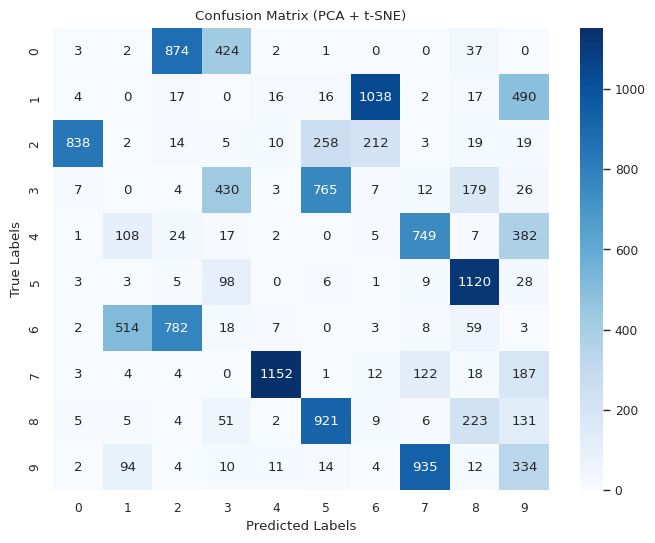

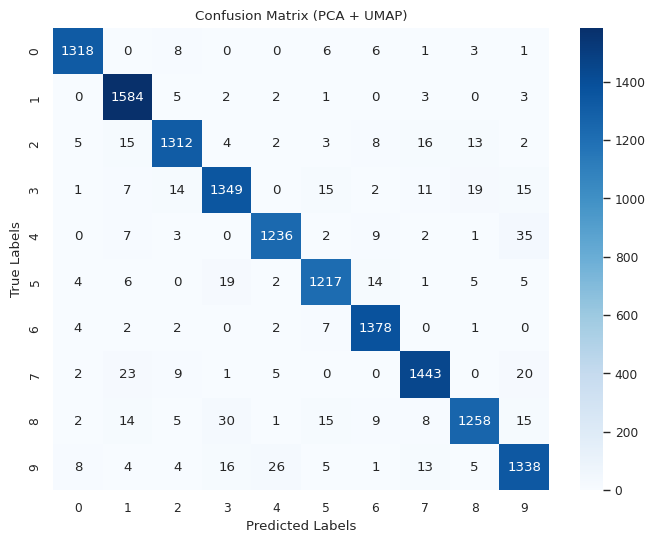

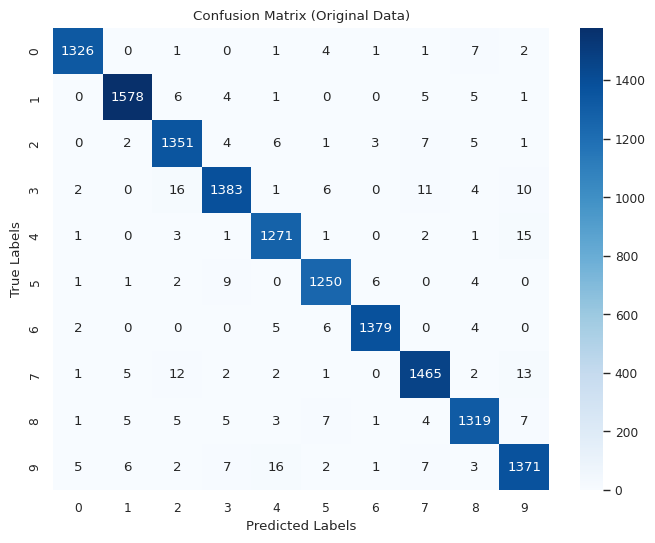

<ipython-input-1-67c13d6b4105>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=accuracies, palette="viridis")


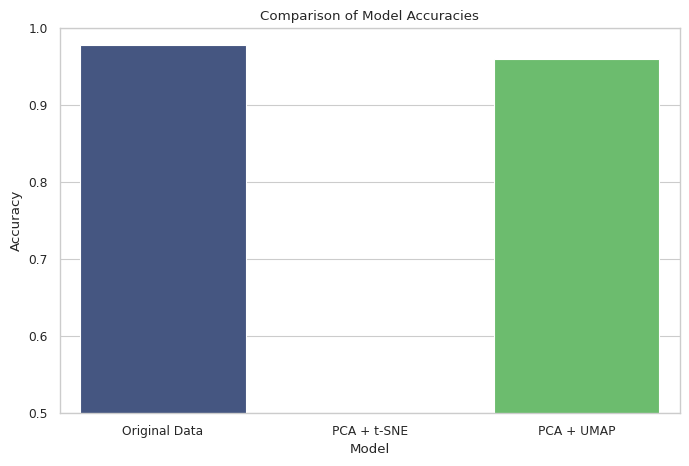

In [1]:
!pip install umap-learn xgboost
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(context="paper", style="whitegrid", palette="pastel")

# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionality Reduction
# PCA
pca = PCA(n_components=50, random_state=42)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

# t-SNE on PCA
tsne = TSNE(n_components=2, random_state=42, init="random", learning_rate="auto")
tsne_train = tsne.fit_transform(pca_train)
tsne_test = tsne.fit_transform(pca_test)

# UMAP on PCA
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_train = umap_reducer.fit_transform(pca_train)
umap_test = umap_reducer.transform(pca_test)

# Plot t-SNE and UMAP embeddings
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=tsne_train[:, 0], y=tsne_train[:, 1], hue=y_train, palette="Spectral", s=10, legend=False)
plt.title("t-SNE Embedding (Train Data)")

plt.subplot(1, 2, 2)
sns.scatterplot(x=umap_train[:, 0], y=umap_train[:, 1], hue=y_train, palette="Spectral", s=10, legend=False)
plt.title("UMAP Embedding (Train Data)")

plt.tight_layout()
plt.show()

# Model Training and Evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy ({model_name}): {accuracy:.4f}")
    print(f"Classification Report ({model_name}):\n{classification_report(y_test, predictions)}")
    return accuracy, predictions

# Model 1: PCA + t-SNE
model_tsne = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
accuracy_tsne, tsne_pred = evaluate_model(model_tsne, tsne_train, y_train, tsne_test, y_test, "PCA + t-SNE")

# Model 2: PCA + UMAP
model_umap = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
accuracy_umap, umap_pred = evaluate_model(model_umap, umap_train, y_train, umap_test, y_test, "PCA + UMAP")

# Original Dataset (non-reduced)
model_original = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
accuracy_original, original_pred = evaluate_model(model_original, X_train, y_train, X_test, y_test, "Original Data")

# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix ({title})")
    plt.show()

plot_confusion_matrix(y_test, tsne_pred, "PCA + t-SNE")
plot_confusion_matrix(y_test, umap_pred, "PCA + UMAP")
plot_confusion_matrix(y_test, original_pred, "Original Data")

# Comparison of Accuracies
accuracies = pd.DataFrame({
    "Model": ["Original Data", "PCA + t-SNE", "PCA + UMAP"],
    "Accuracy": [accuracy_original, accuracy_tsne, accuracy_umap]
})

plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=accuracies, palette="viridis")
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0.5, 1)
plt.show()
